In [1]:
import pandas as pd
import numpy as np

from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectFromModel

from xgboost import plot_importance

from matplotlib import pyplot

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

import os


In [3]:

filepath=os.path.abspath('D:\DataSets\Build-DataSet\S50F15M_LS\Label&Feature 3Q20To1Q21\Long_Label_3q20-1q21\MLTrain-Long_S50M15_3Q20To1Q21.csv')

dataset =pd.read_csv(filepath,index_col="datetime", parse_dates=['datetime'],dayfirst=True)
dataset.drop(columns=['open','high','low','close'],inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4005 entries, 2020-07-01 09:45:00 to 2021-03-31 16:45:00
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   indy_ma-550             4005 non-null   float64
 1   indy_ma-1100            4005 non-null   float64
 2   indy_hh-550             4005 non-null   float64
 3   indy_ll-550             4005 non-null   float64
 4   indy_mid-550            4005 non-null   float64
 5   indy_hh2-1100           4005 non-null   float64
 6   indy_ll2-1100           4005 non-null   float64
 7   indy_mid2-1100          4005 non-null   float64
 8   indy_macd110-440        4005 non-null   float64
 9   indy_signal110-440-110  4005 non-null   float64
 10  indy_hist_macd110-440   4005 non-null   float64
 11  indy_rsi25-ma20         4005 non-null   float64
 12  indy_6ATRTrail_DC-110   4005 non-null   float64
 13  cate_3trend-550_ma110   4005 non-null   int64  
 14  cate

In [4]:
# assuming label must be last column (It is a must)
# split data into X and y
labelname=dataset.columns[len(dataset.columns)-1]

X_df=dataset.drop(labelname,1)
Y_df=dataset[labelname]

#Use either to_numpy or .values
X=X_df.to_numpy()
Y=Y_df.to_numpy()



In [5]:
X_df.tail(3)

,indy_ma-550,indy_ma-1100,indy_hh-550,indy_ll-550,indy_mid-550,indy_hh2-1100,indy_ll2-1100,indy_mid2-1100,indy_macd110-440,indy_signal110-440-110,indy_hist_macd110-440,indy_rsi25-ma20,indy_6ATRTrail_DC-110,cate_3trend-550_ma110,cate_2trend-1100_ma220,cate_rannkHL1100-ma66,cate_CombineTrend
datetime,,,,,,,,,,,,,,,,,
2021-03-31 16:15:00,0.99,0.98,1.02,0.95,0.001,1.02,0.94,0.001,2.53,1.14,1.39,46.28,1.0,3,0,3,4
2021-03-31 16:30:00,0.99,0.98,1.02,0.95,0.001,1.02,0.94,0.001,2.58,1.12,1.46,46.08,1.0,3,0,3,4
2021-03-31 16:45:00,0.99,0.98,1.02,0.95,0.001,1.02,0.94,0.001,2.61,1.11,1.51,45.92,1.0,3,0,3,4


In [6]:

Y_df.tail(3)

datetime
2021-03-31 16:15:00    0
2021-03-31 16:30:00    0
2021-03-31 16:45:00    0
Name: LongSignal, dtype: int64

In [7]:
seed = 7
trian_size = 0.7

#shuffle =True is default
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=trian_size, random_state=seed,shuffle=True)

In [9]:
model=XGBClassifier(n_estimators=100,max_depth=10,learning_rate=0.05)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [10]:
score=model.score(X_test,y_test)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [11]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.57%


In [20]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[2295   18    0]
 [  11 4425    1]
 [   0   13 3219]]
              precision    recall  f1-score   support

           1       1.00      0.99      0.99      2313
           2       0.99      1.00      1.00      4437
           3       1.00      1.00      1.00      3232

    accuracy                           1.00      9982
   macro avg       1.00      1.00      1.00      9982
weighted avg       1.00      1.00      1.00      9982



In [21]:
print(f'feature importances', model.feature_importances_)
print(f'X[all features] score: {score:.04f}')
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

feature importances [0.01581605 0.02250585 0.02253422 0.02536893 0.02814602 0.04359847
 0.02349239 0.05031079 0.03288056 0.03854951 0.06690888 0.07031948
 0.01445105 0.01471718 0.03378145 0.02435113 0.02718991 0.01056895
 0.01150568 0.08503114 0.01721132 0.         0.32076102]
X[all features] score: 0.9957
[[2295   18    0]
 [  11 4425    1]
 [   0   13 3219]]
              precision    recall  f1-score   support

           1       1.00      0.99      0.99      2313
           2       0.99      1.00      1.00      4437
           3       1.00      1.00      1.00      3232

    accuracy                           1.00      9982
   macro avg       1.00      1.00      1.00      9982
weighted avg       1.00      1.00      1.00      9982



# Feature Importance

In [22]:
#create series
importance_series=pd.Series(data=model.feature_importances_,index=X_df.columns)
importance_series.sort_values(ascending=False)

cate_CombineTrend         0.320761
cate_rannkHL1100-MA66     0.085031
indy_macd110-440          0.070319
indy_mid2-1100            0.066909
indy_mid-550              0.050311
indy_hh-550               0.043598
indy_ll2-1100             0.038550
indy_rsi25-ma20           0.033781
indy_hh2-1100             0.032881
indy_ma-1100              0.028146
indy_6ATRTrail_DC-110     0.027190
indy_ema-600              0.025369
indy_6ATRTrail-110        0.024351
indy_ll-550               0.023492
indy_ma-550               0.022534
indy_ma-440               0.022506
cate_MACDTrend            0.017211
indy_ma-110               0.015816
indy_hist_macd110-440     0.014717
indy_signal110-440-110    0.014451
cate_2trend-1100          0.011506
cate_3trend-550           0.010569
cate_RsiTrend             0.000000
dtype: float32

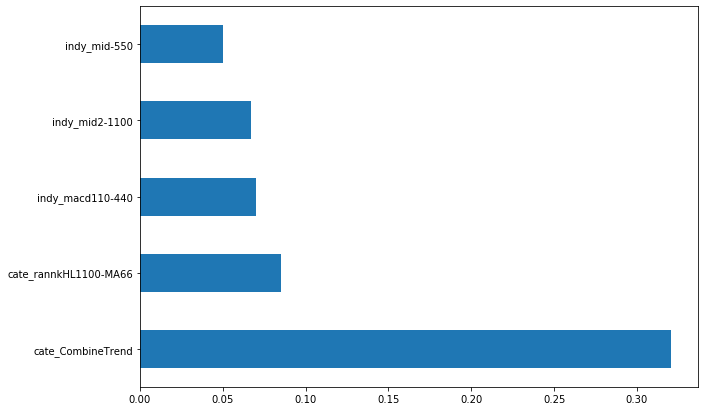

In [23]:
xn=5
topX=importance_series.nlargest(xn)
(topX).plot(kind='barh',figsize=(10,7))


In [28]:

#topX_featList=list(topX.index)
#topX_featList


topX=['cate_CombineTrend','cate_rannkHL1100-MA66','indy_macd110-440','indy_rsi25-ma20','cate_2trend-1100','indy_ma-1100']
topX_featList=topX

# Addcompare both feature

In [29]:
topX_featList.append(('cate_CombineTrend','cate_rannkHL1100-MA66'))
topX_featList.append(('indy_macd110-440','indy_rsi25-ma20'))
topX_featList.append(('cate_2trend-1100','indy_ma-1100'))
topX_featList

['cate_CombineTrend',
 'cate_rannkHL1100-MA66',
 'indy_macd110-440',
 'indy_rsi25-ma20',
 'cate_2trend-1100',
 'indy_ma-1100',
 ('cate_CombineTrend', 'cate_rannkHL1100-MA66'),
 ('indy_macd110-440', 'indy_rsi25-ma20'),
 ('cate_2trend-1100', 'indy_ma-1100')]

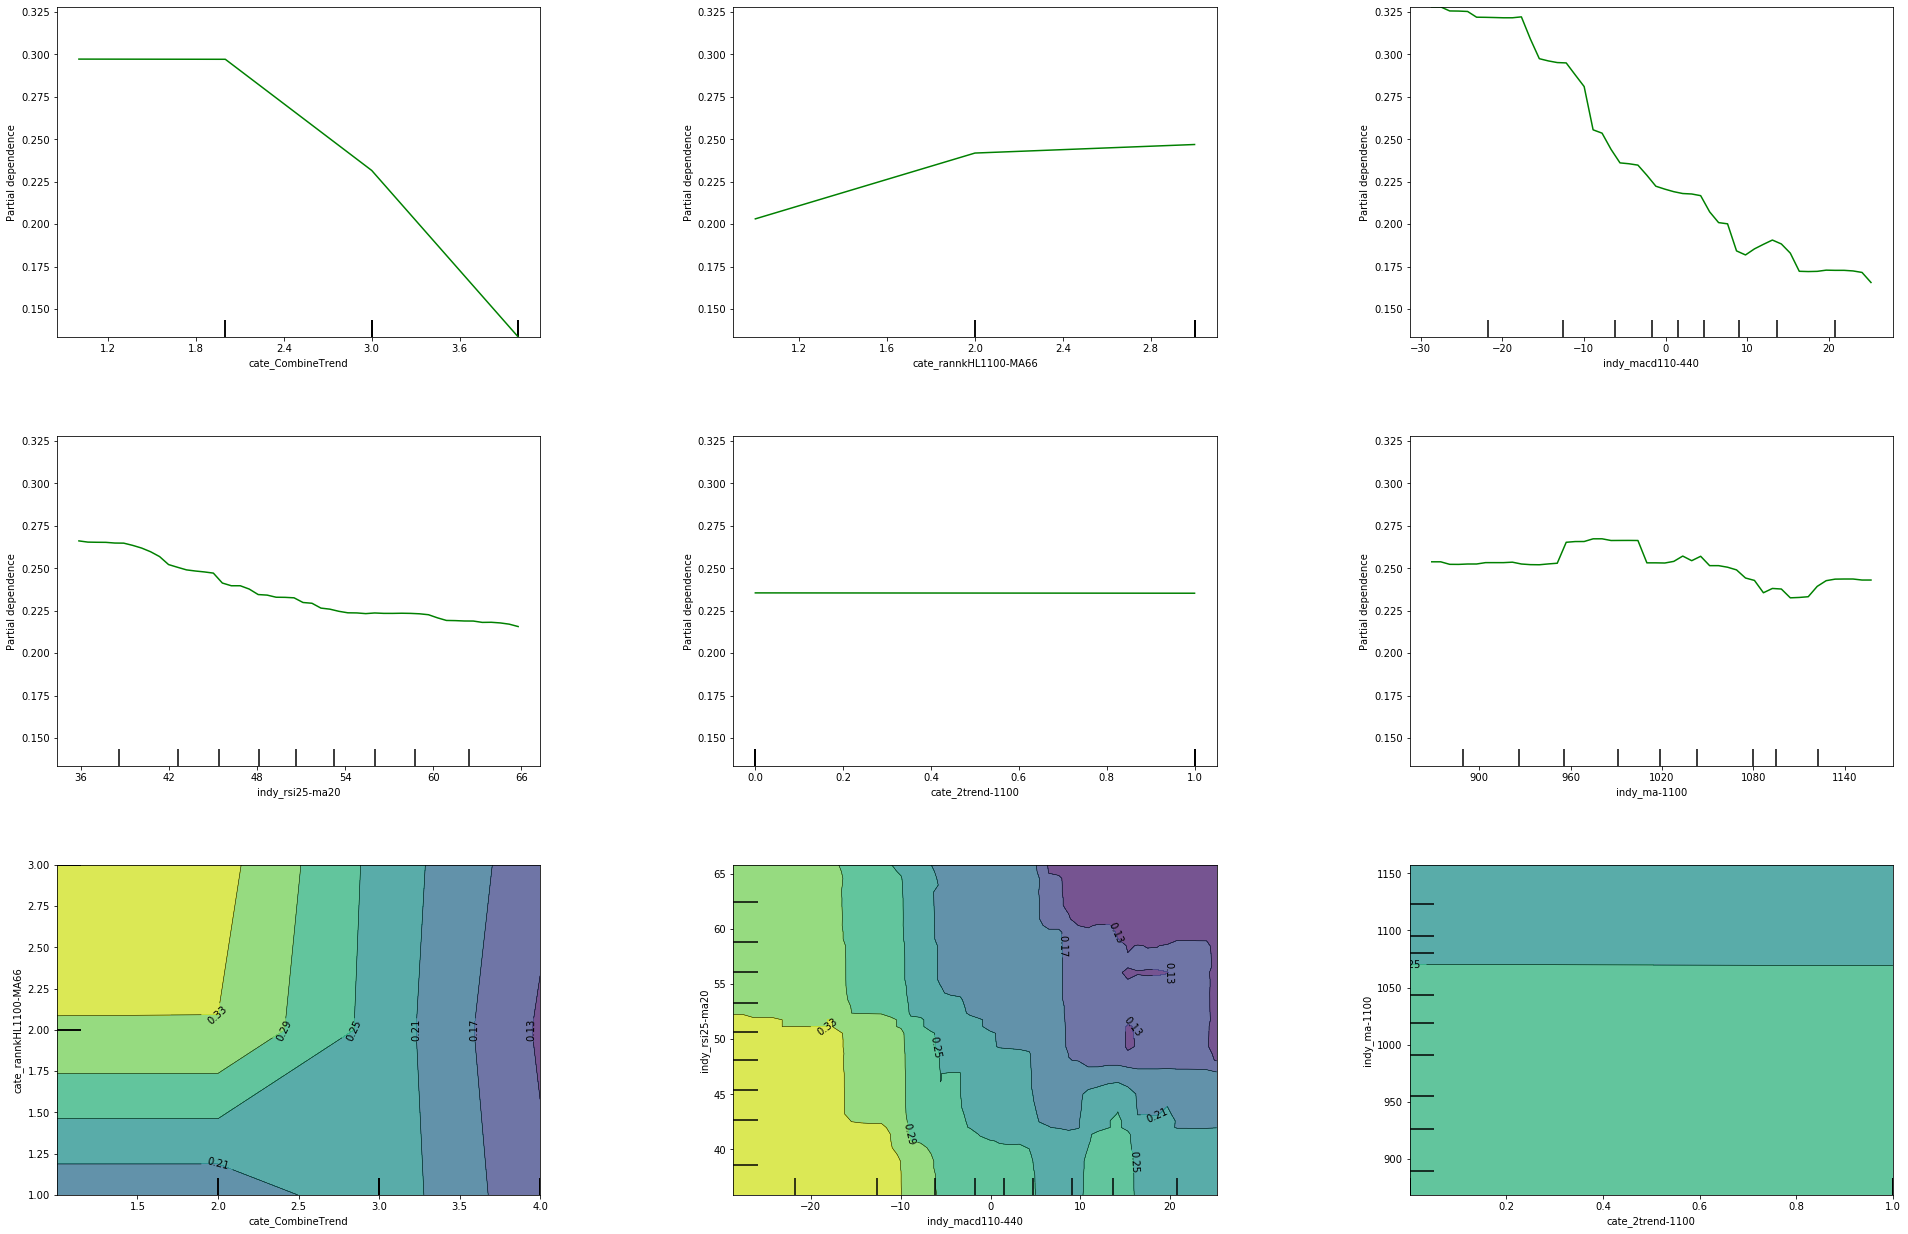

In [30]:
from sklearn.inspection import  plot_partial_dependence
fig= pyplot.figure(figsize=(30,30))
plot_partial_dependence(estimator=model,X=X_train,features=topX_featList, feature_names=np.array(X_df.columns),target=3 , grid_resolution=50,fig=fig)
